In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
new_base_url = 'https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series'

def loadData(fileName, columnName):
    data = pd.read_csv(base_url + fileName) \
             .drop(['Lat', 'Long'], axis=1) \
             .melt(id_vars=['Province/State', 'Country/Region'], var_name='date', value_name=columnName) \
             .fillna('<all>')
    data['date'] = data['date'].astype('datetime64[ns]')
    return data

In [3]:
all_data = loadData("time_series_covid19_confirmed_global.csv", "CumConfirmed") \
    .merge(loadData("time_series_covid19_deaths_global.csv", "CumDeaths")) \
    .merge(loadData("time_series_covid19_recovered_global.csv", "CumRecovered"))

In [5]:
all_data.head()

Province/State Country/Region       date  CumConfirmed  CumDeaths  \
0          <all>    Afghanistan 2020-01-22             0          0   
1          <all>        Albania 2020-01-22             0          0   
2          <all>        Algeria 2020-01-22             0          0   
3          <all>        Andorra 2020-01-22             0          0   
4          <all>         Angola 2020-01-22             0          0   

   CumRecovered  
0             0  
1             0  
2             0  
3             0  
4             0

In [6]:
all_data['Province/State'].unique()

array(['<all>', 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Anhui', 'Beijing', 'Chongqing',
       'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan',
       'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Mayotte', 'New Caledonia',
       'Reunion', 'Saint Barthelemy', 'St Martin', 'Martinique', 'Aruba',
       'Curacao', 'Sint Maarten', 'Bermuda', 'Cayman Islands',
       'Channel Islands', 'Gibraltar', 'Isle of Man', 'Montserrat',
       'Anguilla', 'British Virgin Islands', 'Turks and Caicos Islands'],
      dtype=object

In [7]:
# Opening csv with human development index
dev_index = pd.read_csv('developed_countries.csv')
dev_index.head()

name  humanDevelopmentIndex    pop2020
0       Norway                  0.953   5421.241
1  Switzerland                  0.944   8654.622
2    Australia                  0.939  25499.884
3      Ireland                  0.938   4937.786
4      Germany                  0.936  83783.942

In [8]:
# Creating and pickling population dictionary
pop_dict = dict(zip(dev_index.name, dev_index.pop2020))

with open('./pickled_files/population_dict.pkl', 'wb') as f:
    pickle.dump(pop_dict, f)
pop_dict

{'Norway': 5421.241,
 'Switzerland': 8654.622,
 'Australia': 25499.884,
 'Ireland': 4937.786,
 'Germany': 83783.942,
 'Iceland': 341.243,
 'Sweden': 10099.265,
 'Hong Kong': 7496.981,
 'Singapore': 5850.342,
 'Netherlands': 17134.872,
 'Denmark': 5792.202,
 'Canada': 37742.154,
 'United States': 331002.651,
 'United Kingdom': 67886.011,
 'Finland': 5540.72,
 'New Zealand': 4822.233,
 'Belgium': 11589.623,
 'Liechtenstein': 38.128,
 'Japan': 126476.461,
 'Austria': 9006.398,
 'Luxembourg': 625.978,
 'South Korea': 51269.185,
 'Israel': 8655.535,
 'France': 65273.511,
 'Slovenia': 2078.938,
 'Spain': 46754.778,
 'Czech Republic': 10708.981,
 'Italy': 60461.826,
 'Malta': 441.543,
 'Estonia': 1326.535,
 'Greece': 10423.054,
 'Cyprus': 1207.359,
 'Poland': 37846.611,
 'United Arab Emirates': 9890.402,
 'Lithuania': 2722.289,
 'Andorra': 77.265,
 'Qatar': 2881.053,
 'Slovakia': 5459.642,
 'Brunei': 437.479,
 'Saudi Arabia': 34813.871,
 'Portugal': 10196.709,
 'Latvia': 1886.198,
 'Bahrain':

In [9]:
# Creating and pickling index dictionary
index_dict = dict(zip(dev_index.name, dev_index.humanDevelopmentIndex))
with open('./pickled_files/dev_index_dict.pkl',  'wb') as f:
    pickle.dump(index_dict, f)
index_dict

{'Norway': 0.953,
 'Switzerland': 0.944,
 'Australia': 0.939,
 'Ireland': 0.938,
 'Germany': 0.936,
 'Iceland': 0.935,
 'Sweden': 0.933,
 'Hong Kong': 0.933,
 'Singapore': 0.932,
 'Netherlands': 0.931,
 'Denmark': 0.929,
 'Canada': 0.926,
 'United States': 0.924,
 'United Kingdom': 0.922,
 'Finland': 0.92,
 'New Zealand': 0.917,
 'Belgium': 0.916,
 'Liechtenstein': 0.916,
 'Japan': 0.909,
 'Austria': 0.908,
 'Luxembourg': 0.904,
 'South Korea': 0.903,
 'Israel': 0.903,
 'France': 0.901,
 'Slovenia': 0.896,
 'Spain': 0.891,
 'Czech Republic': 0.888,
 'Italy': 0.88,
 'Malta': 0.878,
 'Estonia': 0.871,
 'Greece': 0.87,
 'Cyprus': 0.869,
 'Poland': 0.865,
 'United Arab Emirates': 0.863,
 'Lithuania': 0.858,
 'Andorra': 0.858,
 'Qatar': 0.856,
 'Slovakia': 0.855,
 'Brunei': 0.853,
 'Saudi Arabia': 0.853,
 'Portugal': 0.847,
 'Latvia': 0.847,
 'Bahrain': 0.846,
 'Chile': 0.843,
 'Hungary': 0.838,
 'Croatia': 0.831,
 'Argentina': 0.825,
 'Oman': 0.821,
 'Russia': 0.816,
 'Montenegro': 0.814,


In [10]:
all_data.head()

Province/State Country/Region       date  CumConfirmed  CumDeaths  \
0          <all>    Afghanistan 2020-01-22             0          0   
1          <all>        Albania 2020-01-22             0          0   
2          <all>        Algeria 2020-01-22             0          0   
3          <all>        Andorra 2020-01-22             0          0   
4          <all>         Angola 2020-01-22             0          0   

   CumRecovered  
0             0  
1             0  
2             0  
3             0  
4             0

In [11]:
all_data.dtypes

Province/State            object
Country/Region            object
date              datetime64[ns]
CumConfirmed               int64
CumDeaths                  int64
CumRecovered               int64
dtype: object

In [12]:
# def to_float(series):
#     series.astype(float)
#     return series

In [13]:
grouped_country = all_data.groupby('Country/Region').max().reset_index()
grouped_country.head()

Country/Region Province/State       date  CumConfirmed  CumDeaths  \
0    Afghanistan          <all> 2020-03-28           110          4   
1        Albania          <all> 2020-03-28           197         10   
2        Algeria          <all> 2020-03-28           454         29   
3        Andorra          <all> 2020-03-28           308          3   
4         Angola          <all> 2020-03-28             5          0   

   CumRecovered  
0             2  
1            31  
2            65  
3             1  
4             0

In [14]:
# Grouping data by country
grouped_country.drop('Province/State', axis=1, inplace=True)


In [15]:
grouped_country.head()


Country/Region       date  CumConfirmed  CumDeaths  CumRecovered
0    Afghanistan 2020-03-28           110          4             2
1        Albania 2020-03-28           197         10            31
2        Algeria 2020-03-28           454         29            65
3        Andorra 2020-03-28           308          3             1
4         Angola 2020-03-28             5          0             0

In [16]:
grouped_country['dev_index'] = grouped_country['Country/Region'].map(index_dict)
grouped_country['population'] = grouped_country['Country/Region'].map(pop_dict)
grouped_country.set_index('Country/Region', inplace=True)
grouped_country.head()

date  CumConfirmed  CumDeaths  CumRecovered  dev_index  \
Country/Region                                                                
Afghanistan    2020-03-28           110          4             2      0.498   
Albania        2020-03-28           197         10            31      0.785   
Algeria        2020-03-28           454         29            65      0.754   
Andorra        2020-03-28           308          3             1      0.858   
Angola         2020-03-28             5          0             0      0.581   

                population  
Country/Region              
Afghanistan      38928.346  
Albania           2877.797  
Algeria          43851.044  
Andorra             77.265  
Angola           32866.272

In [17]:
# Checking for missing values
grouped_country[grouped_country['dev_index'].isna()]

date  CumConfirmed  CumDeaths  CumRecovered  \
Country/Region                                                          
Burma               2020-03-28             8          0             0   
Cabo Verde          2020-03-28             5          1             0   
Congo (Brazzaville) 2020-03-28             4          0             0   
Congo (Kinshasa)    2020-03-28            65          6             2   
Cote d'Ivoire       2020-03-28           101          0             3   
Czechia             2020-03-28          2631         11            11   
Diamond Princess    2020-03-28           712         10           597   
Eswatini            2020-03-28             9          0             0   
Holy See            2020-03-28             6          0             0   
Korea, South        2020-03-28          9478        144          4811   
Kosovo              2020-03-28            91          1             1   
MS Zaandam          2020-03-28             2          0             0   
Monaco              2020-03-28            42          0             1   
North Macedonia     2020-03-28           241          4             3   
San Marino          2020-03-28           224         22             6   
Syria               2020-03-28             5          0             0   
Taiwan*             2020-03-28           283          2            30   
US                  2020-03-28        121478       2026          1072   
West Bank and Gaza  2020-03-28            98          1            18   

                     dev_index  population  
Country/Region                              
Burma                      NaN         NaN  
Cabo Verde                 NaN         NaN  
Congo (Brazzaville)        NaN         NaN  
Congo (Kinshasa)           NaN         NaN  
Cote d'Ivoire              NaN         NaN  
Czechia                    NaN         NaN  
Diamond Princess           NaN         NaN  
Eswatini                   NaN         NaN  
Holy See                   NaN         NaN  
Korea, South               NaN         NaN  
Kosovo                     NaN         NaN  
MS Zaandam                 NaN         NaN  
Monaco                     NaN         NaN  
North Macedonia            NaN         NaN  
San Marino                 NaN         NaN  
Syria                      NaN         NaN  
Taiwan*                    NaN         NaN  
US                         NaN         NaN  
West Bank and Gaza         NaN         NaN

In [18]:
grouped_country.loc['US']

date            2020-03-28 00:00:00
CumConfirmed                 121478
CumDeaths                      2026
CumRecovered                   1072
dev_index                       NaN
population                      NaN
Name: US, dtype: object

In [19]:
# Adding missing values

grouped_country.loc['US', 'dev_index'] = 0.924
grouped_country.loc['Korea, South', 'dev_index'] = 0.903
grouped_country.loc['US', 'population'] = 331002.651
grouped_country.loc['Korea, South', 'population'] = 51269.185

grouped_country

date  CumConfirmed  CumDeaths  CumRecovered  \
Country/Region                                                         
Afghanistan        2020-03-28           110          4             2   
Albania            2020-03-28           197         10            31   
Algeria            2020-03-28           454         29            65   
Andorra            2020-03-28           308          3             1   
Angola             2020-03-28             5          0             0   
...                       ...           ...        ...           ...   
Venezuela          2020-03-28           119          2            39   
Vietnam            2020-03-28           174          0            21   
West Bank and Gaza 2020-03-28            98          1            18   
Zambia             2020-03-28            28          0             0   
Zimbabwe           2020-03-28             7          1             0   

                    dev_index  population  
Country/Region                             
Afghanistan             0.498   38928.346  
Albania                 0.785    2877.797  
Algeria                 0.754   43851.044  
Andorra                 0.858      77.265  
Angola                  0.581   32866.272  
...                       ...         ...  
Venezuela               0.761   28435.940  
Vietnam                 0.694   97338.579  
West Bank and Gaza        NaN         NaN  
Zambia                  0.588   18383.955  
Zimbabwe                0.535   14862.924  

[176 rows x 6 columns]

In [20]:
grouped_country['DeathRate'] = (grouped_country.CumDeaths/grouped_country.CumConfirmed)*100
grouped_country.head()

date  CumConfirmed  CumDeaths  CumRecovered  dev_index  \
Country/Region                                                                
Afghanistan    2020-03-28           110          4             2      0.498   
Albania        2020-03-28           197         10            31      0.785   
Algeria        2020-03-28           454         29            65      0.754   
Andorra        2020-03-28           308          3             1      0.858   
Angola         2020-03-28             5          0             0      0.581   

                population  DeathRate  
Country/Region                         
Afghanistan      38928.346   3.636364  
Albania           2877.797   5.076142  
Algeria          43851.044   6.387665  
Andorra             77.265   0.974026  
Angola           32866.272   0.000000

In [21]:
# sort df by Count column
grouped_country = grouped_country.sort_values(['DeathRate'], ascending=False)
grouped_country.head()

date  CumConfirmed  CumDeaths  CumRecovered  dev_index  \
Country/Region                                                                
Gambia         2020-03-28             3          1             0      0.460   
Nicaragua      2020-03-28             4          1             0      0.658   
Cabo Verde     2020-03-28             5          1             0        NaN   
Sudan          2020-03-28             5          1             0      0.502   
Zimbabwe       2020-03-28             7          1             0      0.535   

                population  DeathRate  
Country/Region                         
Gambia            2416.668  33.333333  
Nicaragua         6624.554  25.000000  
Cabo Verde             NaN  20.000000  
Sudan            43849.260  20.000000  
Zimbabwe         14862.924  14.285714

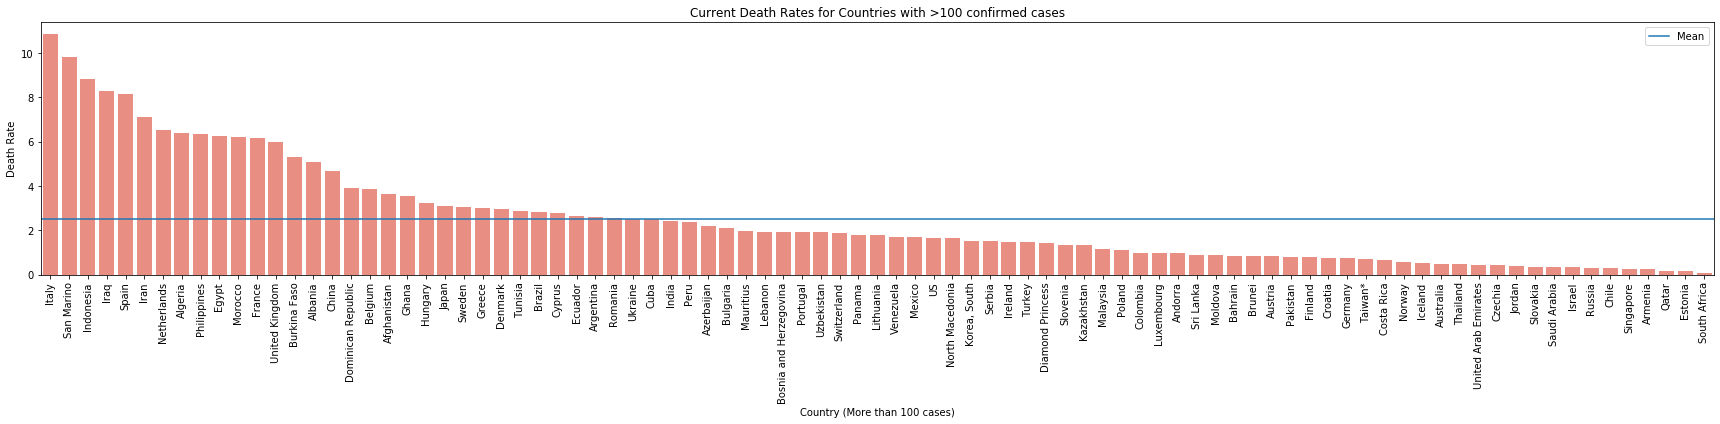

In [22]:
greater_one = grouped_country[grouped_country['DeathRate'] > 0]

more_than_100 = greater_one[greater_one.CumConfirmed > 100]

mean = more_than_100.DeathRate.mean()


fig, ax = plt.subplots(figsize=(24, 6))
ax = sns.barplot(x=more_than_100.index, y=more_than_100.DeathRate, data=more_than_100, color="salmon")
ax.axhline(mean, label='Mean')
ax.set_title('Current Death Rates for Countries with >100 confirmed cases')
plt.xticks(rotation=90)
ax.set(xlabel='Country (More than 100 cases)', ylabel='Death Rate')
plt.tight_layout()
plt.legend()
plt.savefig('current_death_rates.png', dpi=600)

In [23]:
more_than_100.head()

date  CumConfirmed  CumDeaths  CumRecovered  dev_index  \
Country/Region                                                                
Italy          2020-03-28         92472      10023         12384      0.880   
San Marino     2020-03-28           224         22             6        NaN   
Indonesia      2020-03-28          1155        102            59      0.694   
Iraq           2020-03-28           506         42           131      0.685   
Spain          2020-03-28         73235       5982         12285      0.891   

                population  DeathRate  
Country/Region                         
Italy            60461.826  10.838957  
San Marino             NaN   9.821429  
Indonesia       273523.615   8.831169  
Iraq             40222.493   8.300395  
Spain            46754.778   8.168226

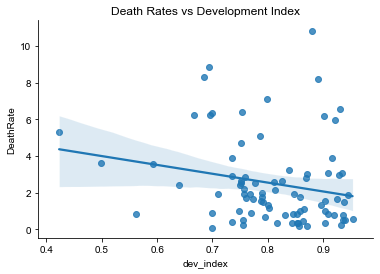

In [24]:
fix, ax = plt.subplots()


sns.set_style('dark')
size = dev_index.pop2020
ax = sns.regplot(x="dev_index", y="DeathRate", data=more_than_100)
ax.set_title('Death Rates vs Development Index')
sns.despine()
plt.savefig('death_rate_v_dev_index.png', dpi=600)

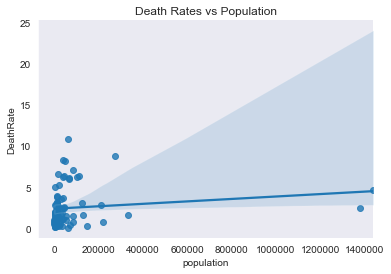

In [25]:
fix, ax = plt.subplots()


sns.set_style('dark')
size = dev_index.pop2020
ax = sns.regplot(x="population", y="DeathRate", data=more_than_100)
ax.set_title('Death Rates vs Population')
sns.despine()
plt.savefig('death_rate_v_population.png', dpi=600)

/Users/rogerlefort/anaconda3/envs/corona/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


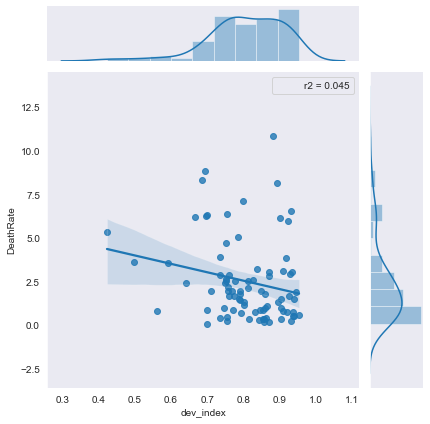

In [26]:
from scipy import stats

x = more_than_100.dev_index
y = more_than_100.DeathRate

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)
plt.savefig('death_rate_v_dev_index_pearson.png', dpi=600)

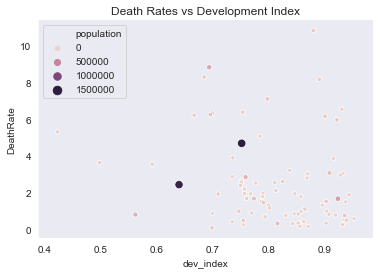

In [27]:
fix, ax = plt.subplots()

sns.set_style('dark')
#size = dev_index['pop2020']
ax = sns.scatterplot(x="dev_index", y="DeathRate", data=more_than_100, size='population', hue="population")
ax.set_title('Death Rates vs Development Index')
sns.despine()
plt.savefig('death_rate_v_dev_index_2.png', dpi=600)

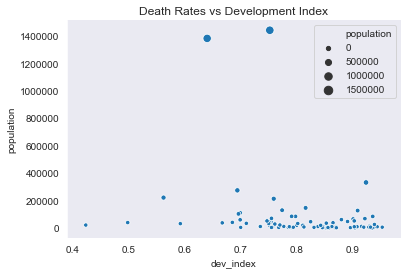

In [28]:
fix, ax = plt.subplots()

sns.set_style('dark')
#size = dev_index['pop2020']
ax = sns.scatterplot(x="dev_index", y="population", data=more_than_100, size='population')
ax.set_title('Death Rates vs Development Index')
sns.despine()
plt.savefig('pop_v_dev_index.png', dpi=600)